# Project: Overview on the Egyptian Economy (1961-2020)

## Table of Contents

<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4. Conclusion</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

### 1.1. Project Goal
This project investigates the economic stability in Egypt during the period (1991-2015), aiming to find trends and explore relationships among selected variables.
### *Why?*
Because economic stability helps other macro-economic objectives to be attained, such as stable prices and stable sustainable growth. It also creates the convenient environment for job creation and a balance of payments (BoP). It only makes sense because stability creates certainty and confidence, thus encourages investment in technology and human capital.


### 1.2. Data Description
All indicators were collected from [Gapminder](https://www.gapminder.org/data/) in CSV format:
- **GDP Growth** (`gdp`)
     - Measures overall domestic production, it functions as a comprehensive scorecard of a given country’s economic health. 
     - Gross domestic product is the total monetary or market value of all the finished goods and services produced within a country’s borders in a specific time period. 
     - In billions of dollars (2005)
     
     
- **Inflation Rate** (`inflation`)
    - Measures the overall impact of price changes for a diversified set of products and services, and allows for a single value representation of the increase in the price level of goods and services in an economy over a period of time. 
    - Inflation is the rate at which the value of a currency is falling and, consequently, the general level of prices for goods and services is rising.
    - As a ratio of GDP (0-1%) 


- **Income** (`income`)
    - Measures of the amount of money earned per person in a nation or geographic region.
    - It's used to determine the average per-person income for an area and to evaluate the standard of living and quality of life of the population. It's calculated by dividing the country's national income by its population.
    - In dollars (2011)
    
    
- **Gini Coefficient** (`gini`)
    - Measures the income inequality or the wealth inequality within a nation or a social group.
    - A Gini coefficient of zero expresses perfect equality, where all values are the same (e.g. where everyone has the same income), while a Gini coefficient of one (or 100%) expresses maximal inequality.
    - 0-100
 

 ### 1.3. Analysis Plan
 This exploratory analysis will tackle the following questions, assuming that our dependant variable is the GDP while other variables are independant for the sake of simplification.
 #### Main Question: How stable was the Egyptian economy during the recent 21 years (1991-2015) ?
 Under which lies these five sub-questions, of which every one will contribute to answering the main question:
 - Question (1): How stable were the prices *measured by the inflation rate* during the selected period?
 - Question (2): How stable was the Balance of Trade during the selected period?
 - Question (3): How stable was the labour market *measured by the employment rate* during the selected period?
 - Question (4): How stable was the government expenditure in investment *measured by the net investment* during the selected period?
 - Question (5): How stable was the Egyptian economy growth *measured by the GDP* during the selected period?
 
 This means that our **dependant variable** will obviously be the economic growth measured by GDP, while other variables remain independant.

In [1]:
# Import needed libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
from pandas_profiling import ProfileReport
from functools import reduce

# Make sure matplotlib graphs are shown inline with output
%matplotlib inline

<a id='wrangling'></a>
## 2. Data Wrangling
### 2.1. Gathering

This is the first step of wrangling data, at which 3 different data sources will be used to collect 3 different file formats. Then import each into a Pandas dataframe to assess in the next step.

<a id='wrangling'></a>

In [2]:
# Load data
gdp = pd.read_csv('total_gdp_us_inflation_adjusted.csv')
inflation = pd.read_csv('inflation_annual_percent.csv')
income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
gini = pd.read_csv('gini_coefficient.csv')

In [6]:
# Check if data was successfully loaded
gini.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2
1,Angola,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
2,Albania,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,...,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7
3,Andorra,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
4,United Arab Emirates,39.8,39.8,39.8,39.8,39.8,39.8,39.8,39.7,39.7,...,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9


<a id='eda'></a>

### 2.2. Assessing
This is the second step of wrangling data where the inspection of our collected data sets from both the Quality and Tidiness perspectives will be conducted.

First of all, I expect to have one major tidiness issue since I'm only interested in Egypt data, while these dataframes include data for different countries. So in this step, I'll look for data issues taking into consideration this significant point.


In [7]:
# Check GDP dataframe
gdp[gdp.country == 'Egypt']

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
55,Egypt,20.3B,21.3B,22.2B,24.5B,27.3B,28.7B,30.1B,30.4B,29.9B,...,294B,300B,307B,316B,329B,344B,358B,377B,398B,412B


In [8]:
# Check Inflation Rate dataframe
inflation[inflation.country == 'Egypt']

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
56,Egypt,1.61,0.396,0.915,0.862,5.46,2.75,2.83,1.8,0.806,...,11.7,19.5,8.71,11.2,9.93,6.25,22.9,21.4,13.6,5.59


In [9]:
# Check income dataframe
income[income.country == 'Egypt']

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
51,Egypt,1110,1110,1110,1110,1110,1110,1110,1110,1110,...,20.9k,21.3k,21.8k,22.2k,22.7k,23.2k,23.7k,24.2k,24.7k,25.2k


In [10]:
# Check gini dataframe
gini[gini.country == 'Egypt']

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
51,Egypt,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,34.4,...,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0


Seems like all is good *so far*. So the plan is to take care of the main tidiness issue first, then adjust other quality issues related to deletion of unrequired rows or renaming variables.



### 2.3. Cleaning
This is the third step of wrangling data where the inspection is put into action, using the *define-code-test* approach. But before efore beginning in this cleaning process, should create a copy of each data table as a best practice.

In [11]:
# Create copies of the original dataframes to avoid data loss
clean_gdp = gdp.copy()
clean_inflation = inflation.copy()
clean_income = income.copy()
clean_gini = gini.copy()

In [12]:
#Check everything is successfully loaded
clean_gini.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,30.5,...,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2,38.2
1,Angola,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,57.7,...,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
2,Albania,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,39.9,...,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7
3,Andorra,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,42.5,...,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0,35.0
4,United Arab Emirates,39.8,39.8,39.8,39.8,39.8,39.8,39.8,39.7,39.7,...,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9,25.9


### 2.3.1. Tidiness Issues
#### Define:
- Extract only Egypt data into one dataframe
- Transpose the dataframe so years are in rows while indicators values are in columns
- Filter out only the following years: 1961-2020

#### Code:

In [3]:
# Drop all rows, but Egypt row in all dataframes
clean_gdp = gdp[gdp.country == 'Egypt']
clean_inflation = inflation[inflation.country == 'Egypt']
clean_income = income[income.country == 'Egypt']
clean_gini = gini[gini.country == 'Egypt']

#Test
clean_inflation

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
56,Egypt,1.61,0.396,0.915,0.862,5.46,2.75,2.83,1.8,0.806,...,11.7,19.5,8.71,11.2,9.93,6.25,22.9,21.4,13.6,5.59


In [4]:
# Transform the table structure so it makes more sense as years in rows not columns
clean_gdp = clean_gdp.melt(id_vars=["country"], var_name="year", value_name="GDP")
clean_inflation = clean_inflation.melt(id_vars=["country"], var_name="year", value_name="inflation")
clean_income = clean_income.melt(id_vars=["country"], var_name="year", value_name="income")
clean_gini = clean_gini.melt(id_vars=["country"], var_name="year", value_name="gini_coefficient")

In [18]:
#Test
clean_inflation

,country,year,inflation
0,Egypt,1961,1.61
1,Egypt,1962,0.396
2,Egypt,1963,0.915
3,Egypt,1964,0.862
4,Egypt,1965,5.46
5,Egypt,1966,2.75
6,Egypt,1967,2.83
7,Egypt,1968,1.8
8,Egypt,1969,0.806
9,Egypt,1970,12.5


In [19]:
# data = [clean_gdp, clean_inflation, clean_income, clean_gini]
# tst = reduce(lambda  left,right: pd.merge(left,right,on=['year', 'country'], how='outer'), data)

In [84]:
#Add the extracted rows together and reset index
df = pd.merge(clean_gdp, clean_inflation,
                on=['year', 'country']).merge(clean_income,
                                              on=['year', 'country']).merge(clean_gini,
                                                                            on=['year', 'country'])

#### Test:

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           60 non-null     object 
 1   year              60 non-null     object 
 2   GDP               60 non-null     object 
 3   inflation         60 non-null     object 
 4   income            60 non-null     object 
 5   gini_coefficient  60 non-null     float64
dtypes: float64(1), object(5)
memory usage: 3.3+ KB


### 2.3.2. Quality Issues

#### Define:
- Eliminate `country` column to make more sense since it's all about Egypt.
- Transform datatypes to their corresponding types.

#### Code:

In [85]:
# Delete country column
del df['country']

In [86]:
#Transform indicators datatypes to float

#year
df['year'] = df['year'].astype(int)

#inflation
df['inflation'] = df['inflation'].str.replace('−', '-').astype(float)
#Edit some losses
df['inflation'][13] = 9.42
df['inflation'][18] = 23.5

#income
mp = {'k':' * 10**3', 'B':' * 10**9'}
df['income'] = pd.eval(df['income'].replace(mp.keys(), mp.values(),
                                            regex=True).str.replace(r'[^\d\.\*]+','', regex=True))
df['income'] = df['income'].astype(float)

#GDP
#Adding another GDP column in dollars for consistency with income
df['GDP_dollars'] = pd.eval(df['GDP'].replace(mp.keys(), mp.values(),
                                              regex=True).str.replace(r'[^\d\.\*]+','', regex=True)).astype(float)
df['GDP'] = df['GDP'].str.replace('B', '').astype(float)
df.rename(columns={'GDP':'GDP_billions'}, inplace=True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


#### Test:

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              60 non-null     int64  
 1   GDP_billions      60 non-null     float64
 2   inflation         60 non-null     float64
 3   income            60 non-null     float64
 4   gini_coefficient  60 non-null     float64
 5   GDP_dollars       60 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 5.3 KB


In [91]:
df.head()

,year,GDP_billions,inflation,income,gini_coefficient,GDP_dollars
0,1961,21.3,1.610,1910.0,25.4,2.130000e+10
1,1962,22.2,0.396,2010.0,25.5,2.220000e+10
2,1963,24.5,0.915,2120.0,25.6,2.450000e+10
3,1964,27.3,0.862,2230.0,25.7,2.730000e+10
4,1965,28.7,5.460,2340.0,25.7,2.870000e+10


Looks like it's all set to begin EDA!

<a id='eda'></a>
## 3. Exploratory Data Analysis
This is the stage where I'll investigate the cleaned dataset, aiming to find some useful insights, guided by the proposed questions.
> Note that all of the EDA is merely tentative.


First of all, I'll start by making a quick report to perform some intial main explorations including checking the variables correlations with each other.

In [93]:
profile = ProfileReport(df, title="Summary Statistics for Economy in Egypt (1961-2020)")
profile

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Interesting! It seems like our dependent variable (economic growth measured by GDP) has a positive relationship with employment, balance of trade and investment. While in the same period of time, it has a negative relationship with inflation. This only makes sense because the first 3 variables, by theory, have a positive effect on economic growth. But regarding the relationship with inflation, it gives us a major hint that inflation in Egypt isn't mainly driven by demand, but mostly with a rise in prices, because theory assumes here and I quote Prof. Colin Cavendish-Jones: "***Economic growth causes higher inflation when it is driven by demand. However, if demand and productive capacity increase at the same rate, inflation will normally remain stable. When inflation is caused solely by a rise in the cost of raw materials, it will not be accompanied by economic growth***". So let's dig deeper into this and try observing the trends in each section following the guiding questions.

### 3.1. Question (1): How stable were the prices measured by the inflation rate during the selected period?
To answer this question, I'll display the inflation rate line plot over time, trying to observe any patterns.  And same thing will be done answering the rest questions.

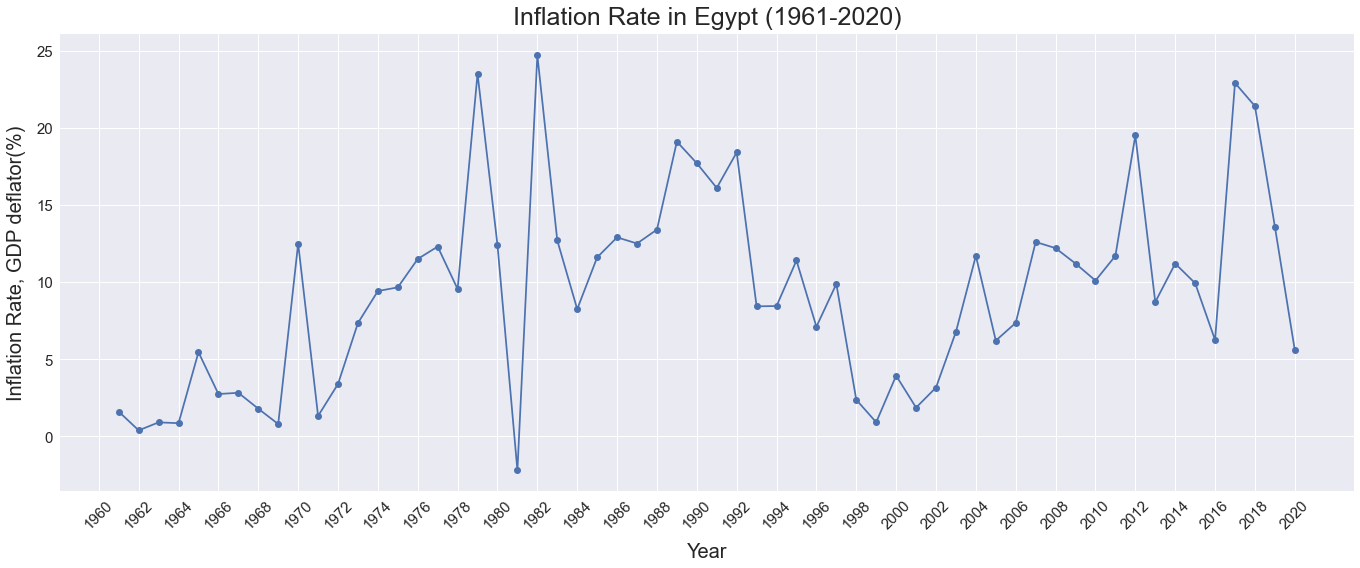

In [136]:
# Create the line plot of Inflation rate over time

plt.style.use('seaborn')

plt.figure(figsize=(19,8))
inflation_series = plt.plot(df.year, df.inflation, linestyle='solid',  marker='o')
years = np.arange(df.year.min()-1, df.year.max()+1, 2)

plt.title('Inflation Rate in Egypt (1961-2020)', fontsize=25, pad=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.xticks(years, rotation=45, fontsize=15)
plt.ylabel('Inflation Rate, GDP deflator(%)', fontsize=20, labelpad=10)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

This graph shows 3 main peaks in inflation rate, let's look at them and see if we can find any logical reasons:
- The first peak in 1995: Historical evidence shows that the Gulf of Aqaba earthquake struck which led to a huge rise in demand, thus high rate of inflation.
- The second peak in 2004: It's relatively lower than the other 2 peaks and no direct reason to be found other than the Sinai bombings that happened in the same year that probably had some kind of effect that is worth looking more into in other investigation.
- The third peak in 2008: It's the highest of them and the historical evidence shows that it's closely related to the global financial crisis that led to world food price crisis.

As well as one main trough happened in 2002 which requires more investigation that is probably for another project.

Taking both into consideration; the graph and the summary statistics for inflation variable provided, during these twenty one years from 1991 till 2015, inflation was highly fluctuating leading to unstable prices. Prices only began to stabilize after 2009 with a relatively low trough in 2012 (which makes sense after 2011 revolution economic recession effects) till 2015.

### 3.2. Question (2): How stable was the Balance of Trade during the selected period?

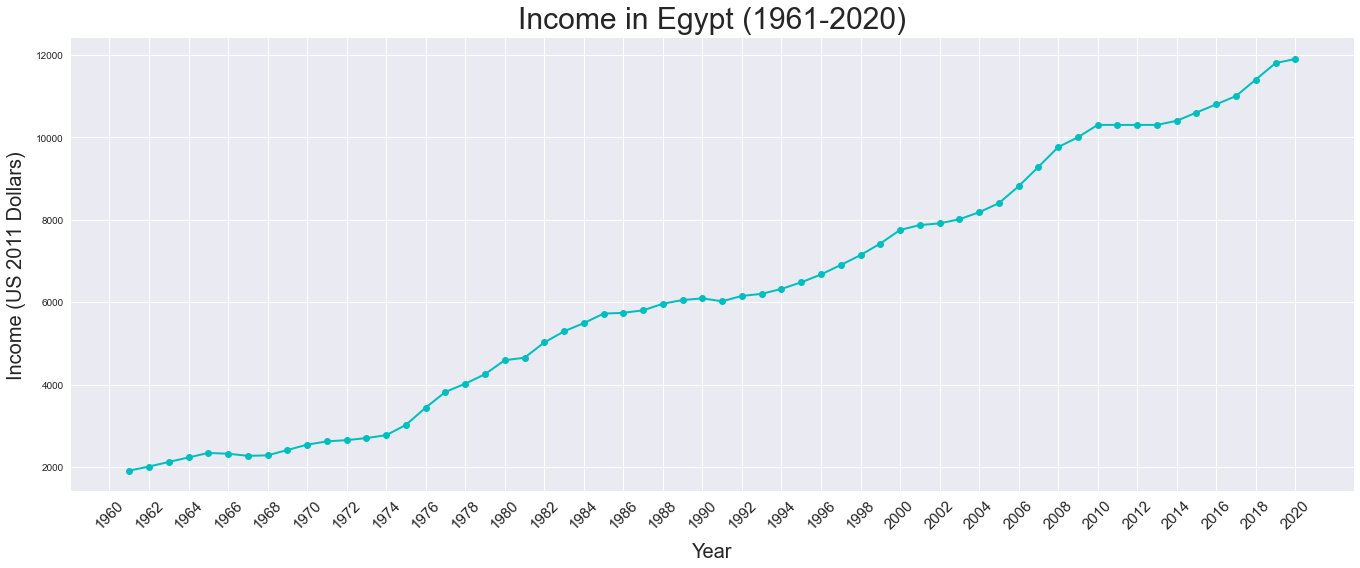

In [144]:
# Create the line plot of BoT over time

plt.style.use('seaborn')

plt.figure(figsize=(19,8))
income_series = plt.plot(df.year, df.income, linestyle='solid', lw=2,  marker='o', color="c")

plt.title('Income in Egypt (1961-2020)', fontsize=30, pad=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.xticks(years, rotation=45, fontsize=15)
plt.ylabel('Income (US 2011 Dollars)', fontsize=20, labelpad=10)

plt.tight_layout()
plt.show()

The first thing to notice is that during the whole period (1991-2015), the Egyptian Balance of Trade was having deficit, meaning that imports were always more than exports. This shows from the negative numbers on the BoT axis. It's very important to grasp this negative numbers fact because, based on it, our perception of the graph will be a bit counter-intuitive since in this case any uprise means larger deficit *(bad thing!)*, while any downturn means smaller deficit *(A very good thing!)*.

The graph shows a fluctuating Balance of Trade that is also within a relatively reasonable range as we can see:
- The maximum valus was **-0.013600** in 2004, which presents the largest deficit during our period of interest.
- The minimum value was **-0.0848** in 2015, which shows the smallest deficit during the same period.

Taking both into consideration; the graph and the summary statistics for Balance of Trade variable provided, during these twenty one years from 1991 till 2015,  BoT was relatively fluctuating within a reasonable range leading to a somehow stable BoT. However, this stable state is in the deficit area, so albeit good in the sense of stablization, it needs improvements to move to the surplus side.

Finally, Balance of Trade is the largest and main content of Balance of Payments. So these numbers probably mean there's a deficit in the BoP during the same 21-year period.

### 3.3. Question (3): How stable was the labour market measured by the employment rate during the selected period?

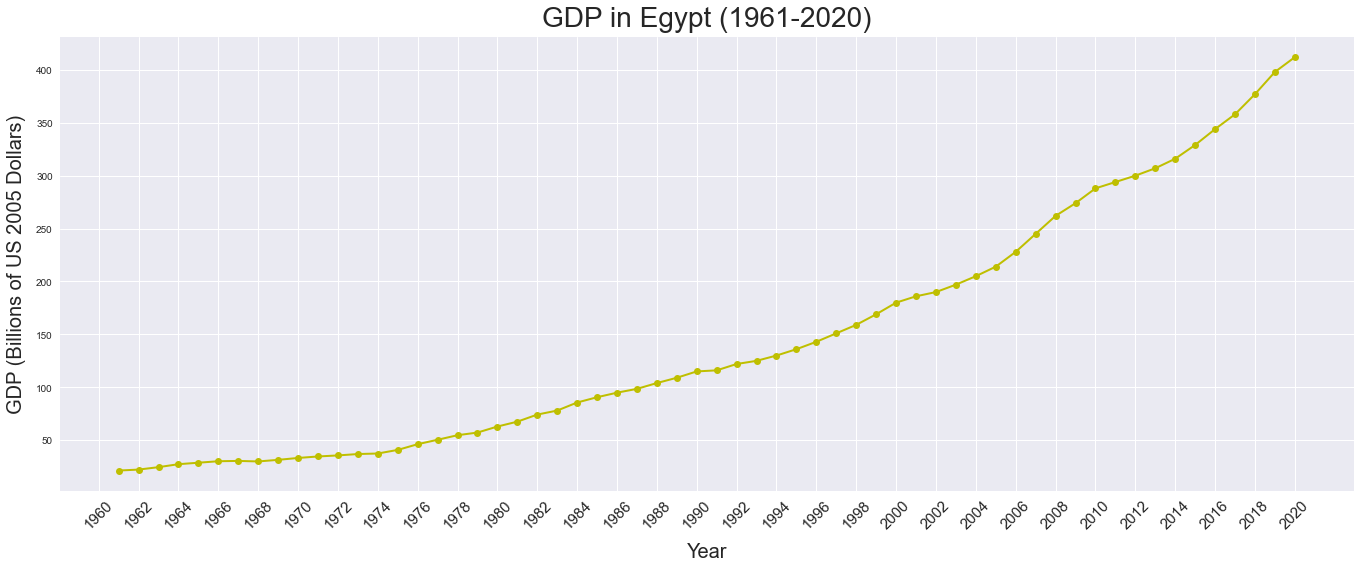

In [152]:
# Create the line plot of Employment rate over time

plt.style.use('seaborn')

plt.figure(figsize=(19,8))
gdp_series = plt.plot(df.year, df.GDP_billions, linestyle='solid', lw=2, color="y",  marker='o')


plt.title('GDP in Egypt (1961-2020)', fontsize=28, pad=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.xticks(years, rotation=45, fontsize=15)
plt.ylabel('GDP (Billions of US 2005 Dollars)', fontsize=20, labelpad=10)

plt.tight_layout()
plt.show()

Employment rate during the whole 21 years didn't fluctuate much. It remained within a very short range (0.406, 0.444) with a mean of about 0.42, which indicates a stable labor market, with the labor force is almost half the population aged +15 years old. 

The graph shows:
- The minimum value was **0.406** in 2002.
- The maximum valus was **0.444** in 2009, right before the political situation got worse and the eruption of Jan2011 revolution.


Taking both into consideration; the graph and the summary statistics for Balance of Trade variable provided, during these twenty one years from 1991 till 2015, employment rate remained within a short range indicating stabilization in the labor force with respect to population.

These numbers may seem to indicate a healthy labor market, but before jumping into conclusion there is a necessary question to ask: "***How was population growing during these 21 years?***" Because if the population wasn't growing (deaths = newborns) or declining (deaths > newborns), employment rate will mean an unhealthy labor market. Fortunately in our case in Egypt, population was growing with a relatively high percentage, which indicates good efforts from the public and private sector creating jobs and making use of the work force.

### 3.4. Question (4): How stable was the government expenditure in investment measured by the net investment during the selected period?

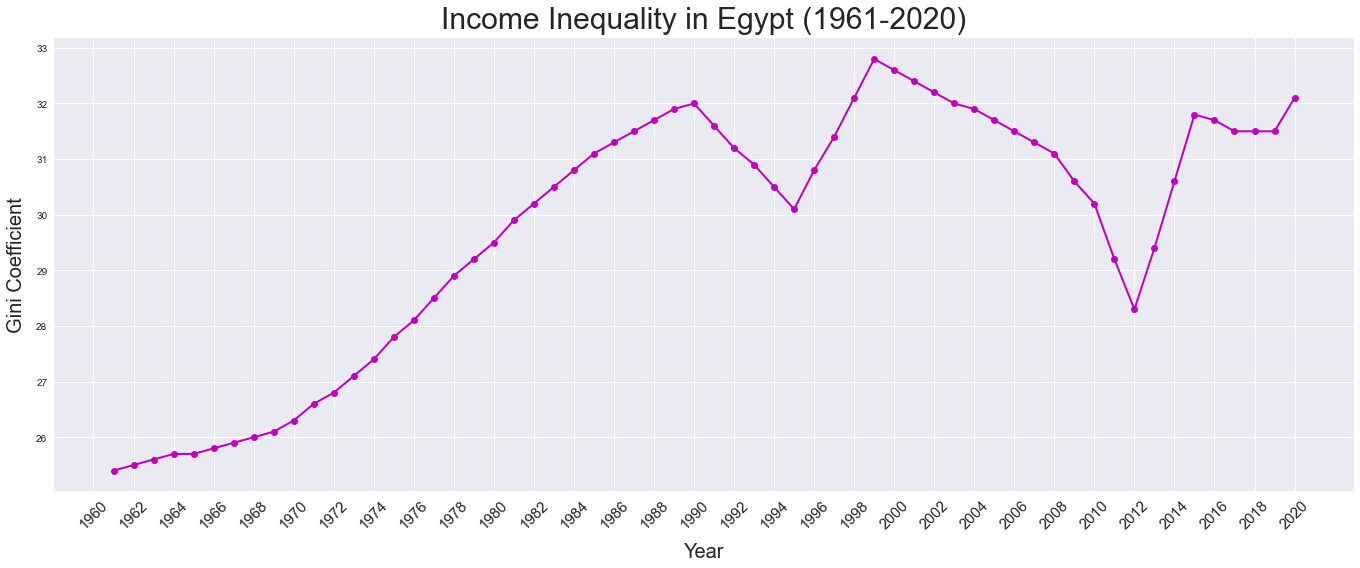

In [153]:
# Create the line plot of EMployment rate over time

plt.style.use('seaborn')

plt.figure(figsize=(19,8))
inequality_series = plt.plot(df.year, df.gini_coefficient, linestyle='solid', lw=2, color="m", marker='o')

plt.title('Income Inequality in Egypt (1961-2020)', fontsize=30, pad=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.xticks(years, rotation=45, fontsize=15)
plt.ylabel('Gini Coefficient', fontsize=20, labelpad=10)

plt.tight_layout()
plt.show()

The graph shows a fluctuating percentage for the Net Investment of the whole Gross Domestic Product. Using Net Investment gives a realistic sense of the real country expenditure in investment, but in the same time this data needs to be put aligned with GDP data, to notice whether the percentage of net investment dropped/rised with a drop/rise in GDP as well or not.

This fluctuation is shows in the above graph as follows:
- The minimum value was about **1.2%** in 1993.
- The maximum valus was about **4.9%** in 2002.

Now, I'll make another graph concerning this question that contains both Net Investment and GDP.

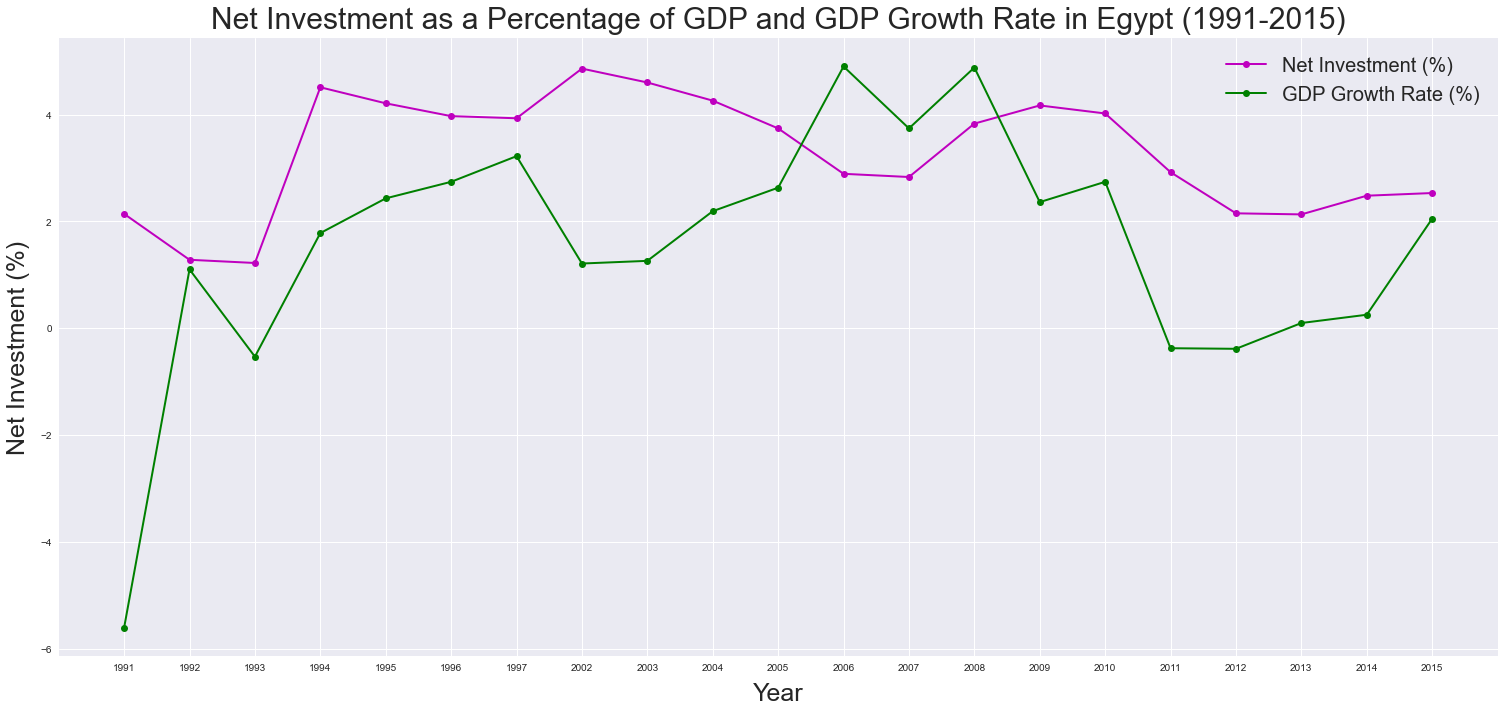

In [73]:
plt.style.use('seaborn')

plt.figure(figsize=(21,10))

investment_stabilization = plt.plot_date(df.year, df.investment, linestyle='solid',
                                         lw=2, color="m", label='Net Investment (%)')

economic_growth_stabilization = plt.plot_date(df.year, df.gdp, linestyle='solid',
                                              lw=2, color="g", label='GDP Growth Rate (%)')


plt.title('Net Investment as a Percentage of GDP and GDP Growth Rate in Egypt (1991-2015)', fontsize=30, pad=10)
plt.xlabel('Year', fontsize=25, labelpad=10)
plt.ylabel('Net Investment (%)', fontsize=25, labelpad=10)

plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

This graph is more insightful! Now it's clear that Net Investment was indeed *unstable* during the 21-year period, except for some improvement in the last 5 years (2010-2015) when it was relatively stable with the percentage growing as the GDP is growing, and declining as the GDP is declining.

### 3.5. Question (5): How stable was the Egyptian economy growth measured by the GDP during the selected period?

> Must note that this question is probably the one that holds the most significance for the sake of this project, because depending on the whole economic growth of a country, other factors, such as a growing investment and stable prices, are implicitly taked into consideration.

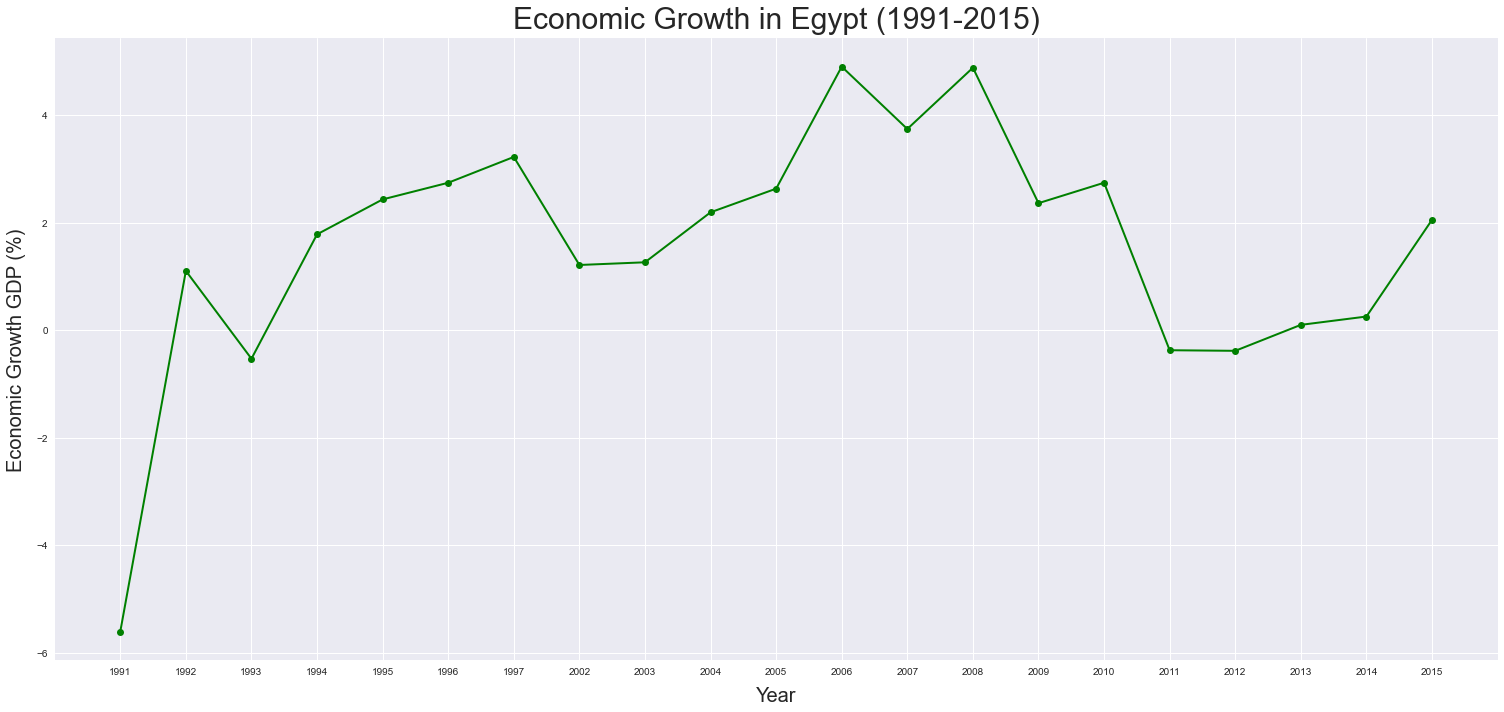

In [61]:
# Create the line plot of EMployment rate over time

plt.style.use('seaborn')

plt.figure(figsize=(21,10))
economic_growth_stabilization = plt.plot_date(df.year, df.gdp, linestyle='solid', lw=2, color="g")

plt.title('Economic Growth in Egypt (1991-2015)', fontsize=30, pad=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Economic Growth GDP (%)', fontsize=20, labelpad=10)

plt.tight_layout()
plt.show()

In [70]:
df.gdp.describe()

count    21.000000
mean      1.555714
std       2.272786
min      -5.610000
25%       0.251000
50%       2.050000
75%       2.740000
max       4.900000
Name: gdp, dtype: float64

The above graph shows somehow stable rate of growth in production during the 21-year period, excluding outliers. It started with a negative economic growth rate, and moved up really fast to remain mostly on the positive growth rate side after 1993 till the end of the period. The following periods are quite similar in pattern:

- (1994-1997) moving from about 1.8% to 3.2% GDP growth rate.
- (2002-2005) moving from about 1.2% to 2.6% GDP growth rate.
- (2011-2014) moving from about -0.4% to 0.3% GDP growth rate.

The mean *1.6%* and the median *2%* are relatively close, meaning that the typical average number of yearly economic growth rate in Egypt during the period (1991-2015) is 1.6%. In other words, the Egyptian economy during the same exact mentioned period expanded yearly on average by 1.6%. This indicates that the 4 components of GDP (personal consumption, business investment, government spending, and net trade) combined also grew with the same rate on average. This growth wasn't on a stable basis.

However, it's better to get the full picture by displaying all of our variables in time series lines to see their development over time.

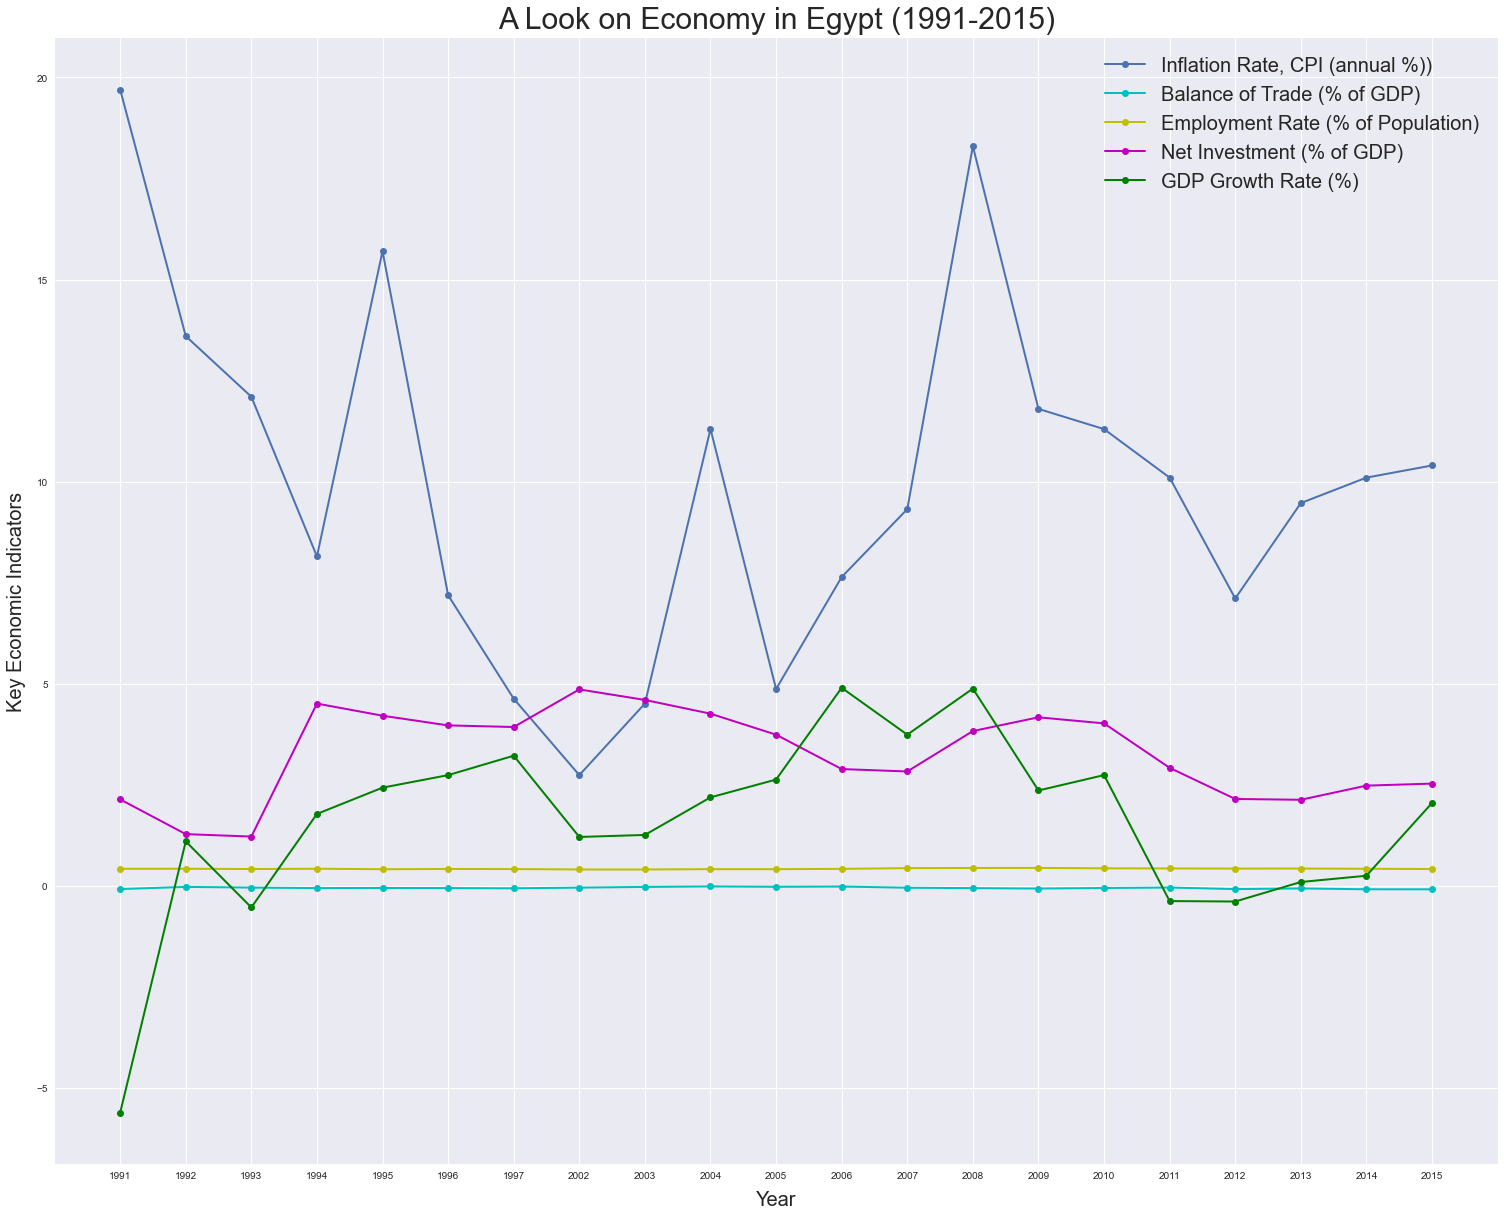

In [77]:
plt.style.use('seaborn')

plt.figure(figsize=(21,17))

prices_stabilization = plt.plot_date(df.year, df.inflation, linestyle='solid', lw=2,
                                     label='Inflation Rate, CPI (annual %))')

trade_balance_stabilization = plt.plot_date(df.year, df.trade_balance, linestyle='solid', lw=2,
                                            color="c", label='Balance of Trade (% of GDP)')

labor_stabilization = plt.plot_date(df.year, df.employment, linestyle='solid', lw=2,
                                    color="y", label='Employment Rate (% of Population)')

investment_stabilization = plt.plot_date(df.year, df.investment, linestyle='solid',
                                         lw=2, color="m", label='Net Investment (% of GDP)')

economic_growth_stabilization = plt.plot_date(df.year, df.gdp, linestyle='solid',
                                              lw=2, color="g", label='GDP Growth Rate (%)')


plt.title('A Look on Economy in Egypt (1991-2015)', fontsize=30, pad=10)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Key Economic Indicators', fontsize=20, labelpad=10)

plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

This graph makes it clear that:
- Employment Rate as well as the deficit in the BoT are almost fixed over time, fluctuating in a very short unnoticable range within the pic picture.
- GDP growth rate, Inflation rate and Net Investment rate were unstable during the period of interest.

Consequently, it's safe to say that ***in a tentative sense*** the whole economic growth was relatively unstable.

<a id='conclusions'></a>
## 4. Conclusions

### 4.1. Limitations

- Economics is a social science, meaning that much of the field is based on human behavior, which can be somewhat irrational and unpredictable. So numbers don't always represent facts.
- For a time series descriptive analysis, a longer period of years is preferable, however this project investigated a 21-year period due to the unavailability of some key indicators for other years.
- Theoritically, employment rate is criticized when used as an indication of labor market health since it doesn’t take into account working conditions, earning power or time worked.

### 4.2. Tentative Observations
With that said, this project tackled the main economic indicators of Egypt in 1991-2015 in order to notice how stable was the Egyptian economy during that period. It was shown that:
- 1. Certain waves of fluctuations exist over the years in the economy.
- 2. These waves are within a *very short range; almost fixed* for Employment rate and Balance of Trade.
- 3. While they get of a *medium range* as for GDP growth and Net Investment percentage of GDP.
- 4. And finally the waves are of a *very high range* regarding Inflation rate, indicating a relatively unstable prices.

In short, the Egyptian economy as a whole is relatively unstable, yet moving in an upward trend. Working on stabilizing the prices is the number one priority for the Egyptian economy to grow more steadily since prices are the most unstable key indicator, and since in economic theory, their stabilization has an immense effect on the whole economy development. Using a well-planned monetary policy shall be a good start. Finally, it must be noted that this project analysis does not imply that one change causes another based on a correlation.

### 4.3. Sources
- https://www.gapminder.org/data/
- https://www.economicsonline.co.uk/Global_economics/Policies_for_stability_and_growth.html
- https://www.eestipank.ee/en/monetary-policy/importance-price-stability
- https://data.oecd.org/emp/employment-rate.htm
- https://www.enotes.com/homework-help/what-is-the-relation-between-inflation-and-2406165
- https://www.enterprise-development.org/what-works-and-why/evidence-framework/link-between-employment-and-economic-growth/
- https://www.imf.org/external/pubs/ft/fandd/basics/monpol.htm
- https://www.thebalance.com/what-is-the-gdp-growth-rate-3306016